In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [11]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [12]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i , sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

In [14]:
X_train = vectorize_sequences(train_data)

In [15]:
X_test = vectorize_sequences(test_data)

In [16]:
def to_one_hot(labels, dimension=46) :
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

In [17]:
one_hot_train_labels = to_one_hot(train_labels)

In [18]:
one_hot_test_labels = to_one_hot(test_labels)

In [21]:
from keras import models
from keras import layers

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(X_train, one_hot_train_labels, epochs=20, batch_size=512, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 1s 145us/step - loss: 2.6591 - accuracy: 0.5209 - val_loss: 1.7451 - val_accuracy: 0.6466
Epoch 2/20
7185/7185 [==============================] - 1s 135us/step - loss: 1.4169 - accuracy: 0.7090 - val_loss: 1.3613 - val_accuracy: 0.7117
Epoch 3/20
7185/7185 [==============================] - 1s 134us/step - loss: 1.0547 - accuracy: 0.7780 - val_loss: 1.1953 - val_accuracy: 0.7323
Epoch 4/20
7185/7185 [==============================] - 1s 134us/step - loss: 0.8423 - accuracy: 0.8255 - val_loss: 1.1128 - val_accuracy: 0.7579
Epoch 5/20
7185/7185 [==============================] - 1s 133us/step - loss: 0.6800 - accuracy: 0.8610 - val_loss: 1.0412 - val_accuracy: 0.7613
Epoch 6/20
7185/7185 [==============================] - 1s 133us/step - loss: 0.5559 - accuracy: 0.8870 - val_loss: 1.0034 - val_accuracy: 0.7869
Epoch 7/20
7185/7185 [==============================] - 1s 134us/step - loss

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

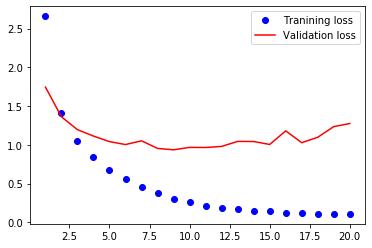

In [39]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

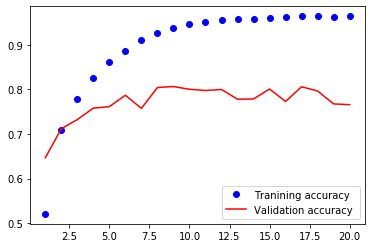

In [40]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()

In [43]:
model_ = models.Sequential()
model_.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_.add(layers.Dense(64, activation='relu'))
model_.add(layers.Dense(46, activation='softmax'))

In [45]:
model_ is model

False

In [46]:
model_.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model_.fit(X_train, one_hot_train_labels, epochs=9, batch_size=512, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/9
7185/7185 [==============================] - 1s 147us/step - loss: 2.6326 - accuracy: 0.5113 - val_loss: 1.7852 - val_accuracy: 0.6244
Epoch 2/9
7185/7185 [==============================] - 1s 135us/step - loss: 1.4767 - accuracy: 0.6799 - val_loss: 1.4224 - val_accuracy: 0.6984
Epoch 3/9
7185/7185 [==============================] - 1s 134us/step - loss: 1.1246 - accuracy: 0.7591 - val_loss: 1.2722 - val_accuracy: 0.7129
Epoch 4/9
7185/7185 [==============================] - 1s 135us/step - loss: 0.9068 - accuracy: 0.8026 - val_loss: 1.1441 - val_accuracy: 0.7457
Epoch 5/9
7185/7185 [==============================] - 1s 133us/step - loss: 0.7377 - accuracy: 0.8381 - val_loss: 1.1189 - val_accuracy: 0.7435
Epoch 6/9
7185/7185 [==============================] - 1s 132us/step - loss: 0.6091 - accuracy: 0.8686 - val_loss: 1.0109 - val_accuracy: 0.7869
Epoch 7/9
7185/7185 [==============================] - 1s 133us/step - loss: 0.498

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

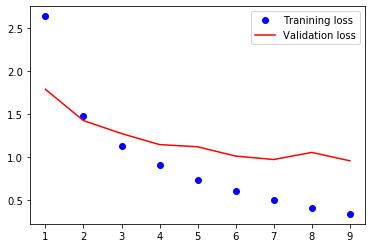

In [49]:
plt.plot(epochs, loss, 'bo', label='Tranining loss ')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()

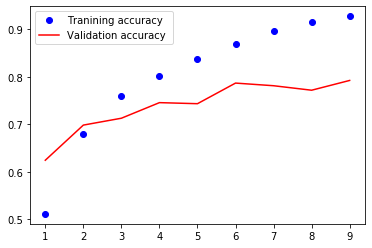

In [50]:
plt.plot(epochs, acc, 'bo', label='Tranining accuracy ')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy ')
plt.legend()